<a href="https://colab.research.google.com/github/SakshiGaikwad22/PRODIGY_DS_TASK/blob/main/Prodigy_DS_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon used for sentiment scoring
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
# Load the CSV file; the dataset does not have a header, so set header=None
df = pd.read_csv('/content/twitter_training.csv', header=None)

# Assign meaningful column names for easier reference
df.columns = ['id', 'entity', 'sentiment', 'text']

# Display the first five rows of the dataframe
df.head()


,id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


<ipython-input-4-57378eb68f10>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


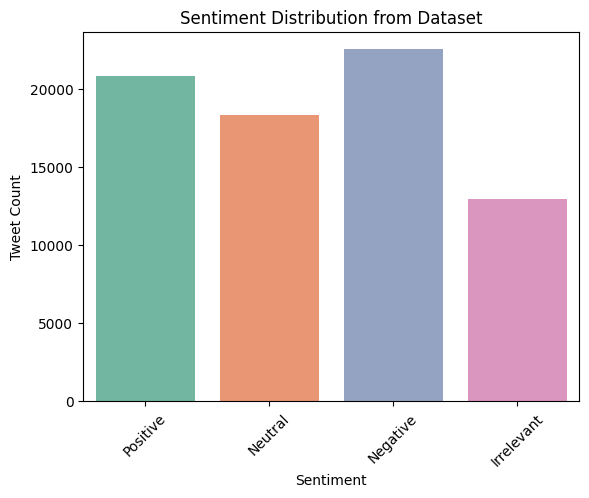

In [4]:
# Visualize the number of tweets under each sentiment category from the original dataset
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title("Sentiment Distribution from Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.show()


In [5]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Calculate the compound score for each tweet text
df['vader_score'] = df['text'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# Define a function to classify sentiment based on compound score
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the classification function to the VADER scores
df['vader_sentiment'] = df['vader_score'].apply(classify_sentiment)

# View updated dataframe with calculated sentiment
df[['text', 'vader_score', 'vader_sentiment']].head()


,text,vader_score,vader_sentiment
0,im getting on borderlands and i will murder yo...,-0.6908,Negative
1,I am coming to the borders and I will kill you...,-0.6908,Negative
2,im getting on borderlands and i will kill you ...,-0.6908,Negative
3,im coming on borderlands and i will murder you...,-0.6908,Negative
4,im getting on borderlands 2 and i will murder ...,-0.6908,Negative


<ipython-input-6-d7e6bfad91c5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='vader_sentiment', palette='coolwarm')


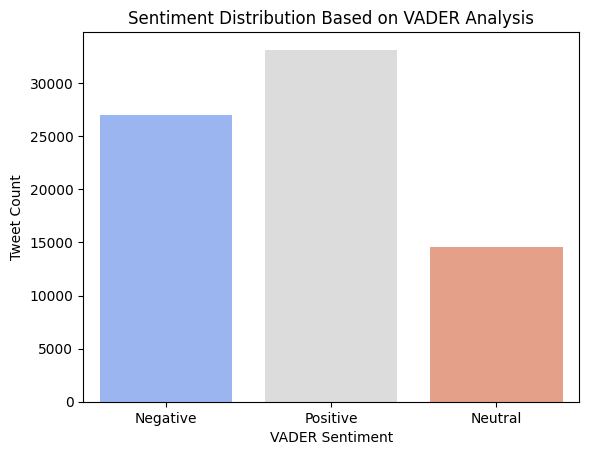

In [6]:
# Plot the distribution of recalculated sentiments using VADER
sns.countplot(data=df, x='vader_sentiment', palette='coolwarm')
plt.title("Sentiment Distribution Based on VADER Analysis")
plt.xlabel("VADER Sentiment")
plt.ylabel("Tweet Count")
plt.show()
